## Importing Data

In [798]:
import snowflake.connector
from snowflake.connector.pandas_tools import write_pandas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Connect to Snowflake
ctx = snowflake.connector.connect(
    user="PRIDE22",
    password="P.Ngomane@2025",
    account="PWDSRNS-IH67248",
    warehouse="COMPUTE_WH",
    database="Loan_Application01",
    schema="PUBLIC"  # Change this if you're using a different schema
)
from snowflake.connector.pandas_tools import write_pandas

# cleaned_df: your cleaned pandas DataFrame
# ctx: your existing Snowflake connection object
# "YOUR_TABLE_NAME": replace with your target table name

write_pandas(ctx, cleaned, "Loan_Application_clean", auto_create_table=True)
 
# Step 2: Create a cursor object
cs = ctx.cursor()
 
try:
    # Step 3: Query or populate the Loan_Application table
    cs.execute("USE WAREHOUSE COMPUTE_WH;")
    cs.execute("USE DATABASE Loan_Application01;")
    cs.execute("USE SCHEMA PUBLIC;")  # Change if needed
 
    # Example: Fetch data from Loan_Application table
    cs.execute("SELECT * FROM Loan_Approval ;")
    rows = cs.fetchall()
 
    # Convert to DataFrame (optional)
    columns = [desc[0] for desc in cs.description]
    df = pd.DataFrame(rows, columns=columns)
    
   
 
finally:
    cs.close()
    

# READING DATASET

In [799]:
df

,LOAN_ID,GENDER,MARRIED,DEPENDENTS,EDUCATION,SELF_EMPLOYED,APPLICANTINCOME,COAPPLICANTINCOME,LOANAMOUNT,LOAN_AMOUNT_TERM,CREDIT_HISTORY,PROPERTY_AREA,LOAN_STATUS
0,LP001003,Male,True,1,Graduate,False,4583,1508.0000000000000,128.0,360.0,1.0,Rural,False
1,LP001005,Male,True,0,Graduate,True,3000,0E-13,66.0,360.0,1.0,Urban,True
2,LP001006,Male,True,0,Not Graduate,False,2583,2358.0000000000000,120.0,360.0,1.0,Urban,True
3,LP001008,Male,False,0,Graduate,False,6000,0E-13,141.0,360.0,1.0,Urban,True
4,LP001013,Male,True,0,Not Graduate,False,2333,1516.0000000000000,95.0,360.0,1.0,Urban,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,True,3+,Graduate,False,5703,0E-13,128.0,360.0,1.0,Urban,True
377,LP002974,Male,True,0,Graduate,False,3232,1950.0000000000000,108.0,360.0,1.0,Rural,True
378,LP002978,Female,False,0,Graduate,False,2900,0E-13,71.0,360.0,1.0,Rural,True
379,LP002979,Male,True,3+,Graduate,False,4106,0E-13,40.0,180.0,1.0,Rural,True


# Analyzing Data

In [800]:
df.shape

(381, 13)

In [801]:
df.columns

Index(['LOAN_ID', 'GENDER', 'MARRIED', 'DEPENDENTS', 'EDUCATION',
       'SELF_EMPLOYED', 'APPLICANTINCOME', 'COAPPLICANTINCOME', 'LOANAMOUNT',
       'LOAN_AMOUNT_TERM', 'CREDIT_HISTORY', 'PROPERTY_AREA', 'LOAN_STATUS'],
      dtype='object')

In [802]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   LOAN_ID            381 non-null    object
 1   GENDER             376 non-null    object
 2   MARRIED            381 non-null    bool  
 3   DEPENDENTS         373 non-null    object
 4   EDUCATION          381 non-null    object
 5   SELF_EMPLOYED      360 non-null    object
 6   APPLICANTINCOME    381 non-null    int64 
 7   COAPPLICANTINCOME  381 non-null    object
 8   LOANAMOUNT         381 non-null    object
 9   LOAN_AMOUNT_TERM   370 non-null    object
 10  CREDIT_HISTORY     351 non-null    object
 11  PROPERTY_AREA      381 non-null    object
 12  LOAN_STATUS        381 non-null    bool  
dtypes: bool(2), int64(1), object(10)
memory usage: 33.6+ KB


# Checking Missing Values

In [803]:
isnull_values = df.isnull().sum()

if isnull_values.sum() == 0:
    print("Null values Not Found")
else:
    print("Null values found:\n", df.isnull().sum())


Null values found:
 LOAN_ID               0
GENDER                5
MARRIED               0
DEPENDENTS            8
EDUCATION             0
SELF_EMPLOYED        21
APPLICANTINCOME       0
COAPPLICANTINCOME     0
LOANAMOUNT            0
LOAN_AMOUNT_TERM     11
CREDIT_HISTORY       30
PROPERTY_AREA         0
LOAN_STATUS           0
dtype: int64


In [804]:
missing_values = df.duplicated().sum()
if missing_values.sum() == 0:
    print('Missing values Not Found')
else:
    print('Missing Values Found')

Missing values Not Found


In [805]:
# Filling missing values for categorical variables with the mode
for column in ['GENDER', 'MARRIED', 'DEPENDENTS', 'SELF_EMPLOYED']:
    df.loc[:, column] = df[column].fillna(df[column].mode()[0])

# Fill missing values in LOAN_AMOUNT_TERM with the median
median_loan_amount_term = df['LOAN_AMOUNT_TERM'].median()
df.loc[df['LOAN_AMOUNT_TERM'].isnull(), 'LOAN_AMOUNT_TERM']

# Fill missing values in CREDIT_HISTORY with the mode
mode_credit_history = df['CREDIT_HISTORY'].mode()[0]
df.loc[df['CREDIT_HISTORY'].isnull(), 'CREDIT_HISTORY'] 
df.reset_index(drop=True)
# Check if there are any missing values left
print("Null values found:\n", df.isnull().sum())

Null values found:
 LOAN_ID               0
GENDER                0
MARRIED               0
DEPENDENTS            0
EDUCATION             0
SELF_EMPLOYED         0
APPLICANTINCOME       0
COAPPLICANTINCOME     0
LOANAMOUNT            0
LOAN_AMOUNT_TERM     11
CREDIT_HISTORY       30
PROPERTY_AREA         0
LOAN_STATUS           0
dtype: int64


C:\Users\Pride Ngomane\AppData\Local\Temp\ipykernel_10980\2500736246.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.loc[:, column] = df[column].fillna(df[column].mode()[0])


In [806]:
statistical_analysis = df.describe().transpose()
statistical_analysis

,count,mean,std,min,25%,50%,75%,max
APPLICANTINCOME,381.0,3579.845144,1419.813818,150.0,2600.0,3333.0,4288.0,9703.0


In [807]:
# Rename columns in the DataFrame
clean = df.rename(columns={
    'LOAN_ID': 'Loan_id',
    'GENDER': 'Gender',
    'MARRIED': 'Married',
    'DEPENDENTS': 'Dependents',
    'EDUCATION': 'Education',
    'SELF_EMPLOYED': 'Self_employed',
    'APPLICANTINCOME': 'Applicant_income',
    'COAPPLICANTINCOME': 'Co-applicant_income',
    'LOANAMOUNT': 'Loan_amount',
    'LOAN_AMOUNT_TERM': 'Loan_amount_term',
    'CREDIT_HISTORY': 'Credit_history',
    'PROPERTY_AREA': 'Property_area',
    'LOAN_STATUS': 'Loan_status'
})



In [808]:
# Replace '0E-13' with 0 or NaN in the 'COAPPLICANTINCOME' column
clean['Co-applicant_income'] = clean['Co-applicant_income'].replace(0E-13, 0)  # Replace with 0
clean['Co-applicant_income'] = clean['Co-applicant_income'].astype(int)



# Importing Faker for names

In [809]:
from faker import Faker
fake = Faker()

# Assuming 'Gender' column exists in clean DataFrame with 'Male' and 'Female' values
def generate_name(gender):
    if gender == 'Male':
        return fake.name_male()
    elif gender == 'Female':
        return fake.name_female()
    else:
        return fake.name()  # fallback for other or missing genders

clean['Name'] = clean['Gender'].apply(generate_name)

# Reorder columns: bring 'Name' column to front
cols = clean.columns.tolist()
cleaned = clean[['Name'] + [col for col in cols if col != 'Name']]


In [810]:
cleaned['Credit_history'] = pd.to_numeric(clean['Credit_history'], errors='coerce').fillna(0).astype(int)  # Convert to numeric, fill invalids with 0, cast to int
cleaned['Loan_amount'] = pd.to_numeric(clean['Loan_amount'], errors='coerce').fillna(0).astype(int)        # Handle bad/missing loan amounts, default to 0
cleaned['Loan_amount_term'] = pd.to_numeric(clean['Loan_amount_term'], errors='coerce').fillna(0).astype(int)  # Clean term data, fill blanks with 0



In [811]:
cleaned['Loan_status'] = cleaned['Loan_status'].replace({True: "Accepted", False: "Declined"}) # Label Mapping

In [812]:
cleaned['Total_income'] = cleaned['Applicant_income'] + cleaned['Co-applicant_income']



In [813]:

cleaned['Loan_amount'] = (cleaned['Loan_amount'] * 1000).astype(int) # Changing valus to thousands

In [814]:
statistical_analysis = cleaned.describe().transpose()
statistical_analysis

,count,mean,std,min,25%,50%,75%,max
Applicant_income,381.0,3579.845144,1419.813818,150.0,2600.0,3333.0,4288.0,9703.0
Co-applicant_income,381.0,1277.272966,2340.818546,0.0,0.0,983.0,2016.0,33837.0
Loan_amount,381.0,104986.876640,28358.463620,9000.0,90000.0,110000.0,127000.0,150000.0
Loan_amount_term,381.0,331.023622,88.482957,0.0,360.0,360.0,360.0,480.0
Credit_history,381.0,0.771654,0.420319,0.0,1.0,1.0,1.0,1.0
Total_income,381.0,4857.118110,2417.071152,1442.0,3664.0,4600.0,5500.0,35673.0


C:\Users\Pride Ngomane\AppData\Local\Temp\ipykernel_10980\1171953954.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data_to_plot[col] for col in columns_to_plot], vert=False, labels=columns_to_plot)


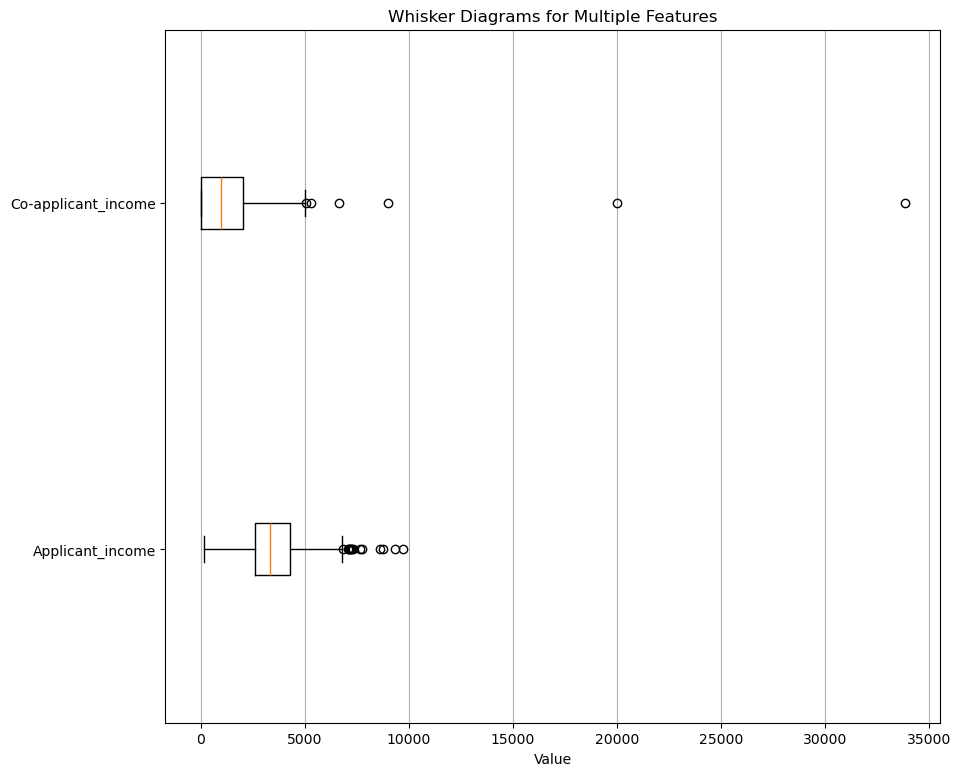

In [815]:
# Columns to include in the box plot
columns_to_plot = ['Applicant_income', 'Co-applicant_income']

# Remove NaNs to avoid plotting issues
data_to_plot = cleaned[columns_to_plot].dropna()

# Create the box plot
plt.figure(figsize=(10, 9))
plt.boxplot([data_to_plot[col] for col in columns_to_plot], vert=False, labels=columns_to_plot)
plt.title('Whisker Diagrams for Multiple Features')
plt.xlabel('Value')
plt.grid(axis='x')
plt.show()


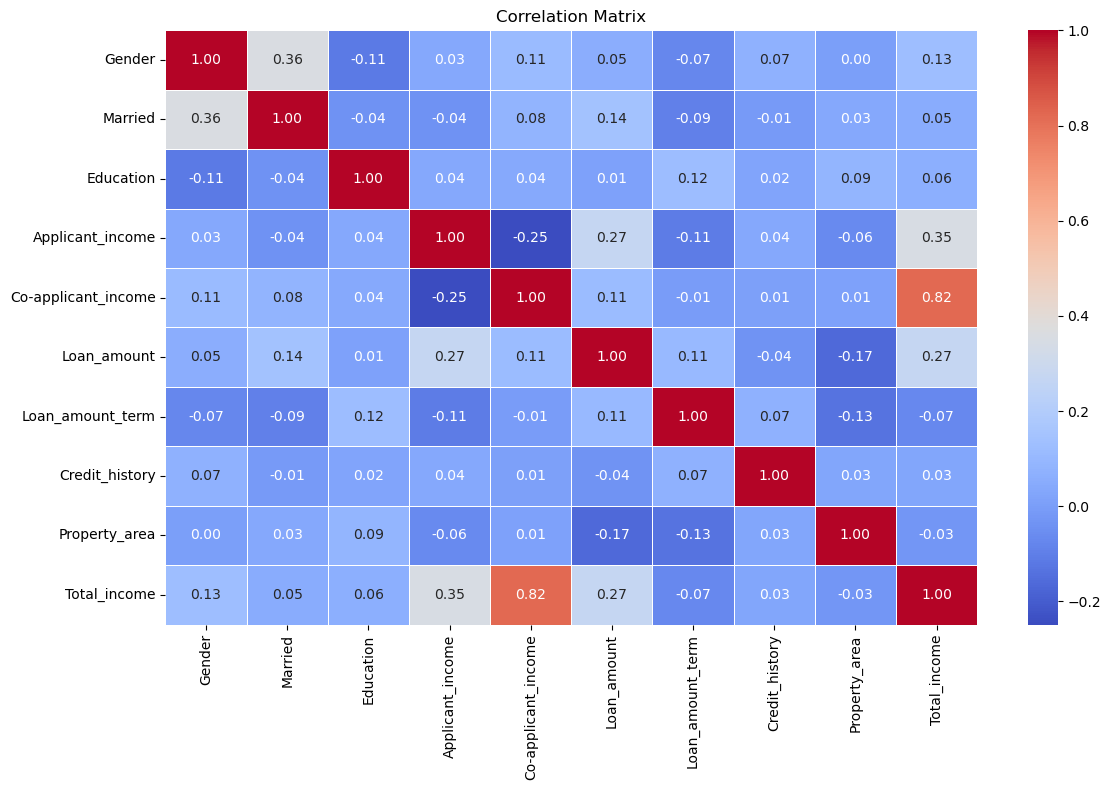

In [816]:
# convert categorical values to numeric
clean_encoded = cleaned.copy()

# Convert boolean columns to int
bool_cols = clean_encoded.select_dtypes(include=['bool']).columns
clean_encoded[bool_cols] = clean_encoded[bool_cols].astype(int)

# Map categorical strings to numeric values
clean_encoded['Gender'] = clean_encoded['Gender'].map({'Male': 1, 'Female': 0})
clean_encoded['Education'] = clean_encoded['Education'].map({'Graduate': 1, 'Not Graduate': 0})
clean_encoded['Property_area'] = clean_encoded['Property_area'].map({'Urban': 2, 'Semiurban': 1, 'Rural': 0})

# Compute the correlation matrix
numeric_clean = clean_encoded.select_dtypes(include=['number'])
corr =numeric_clean.corr()

# Plot
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

C:\Users\Pride Ngomane\AppData\Local\Temp\ipykernel_10980\1499493251.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Cluster')


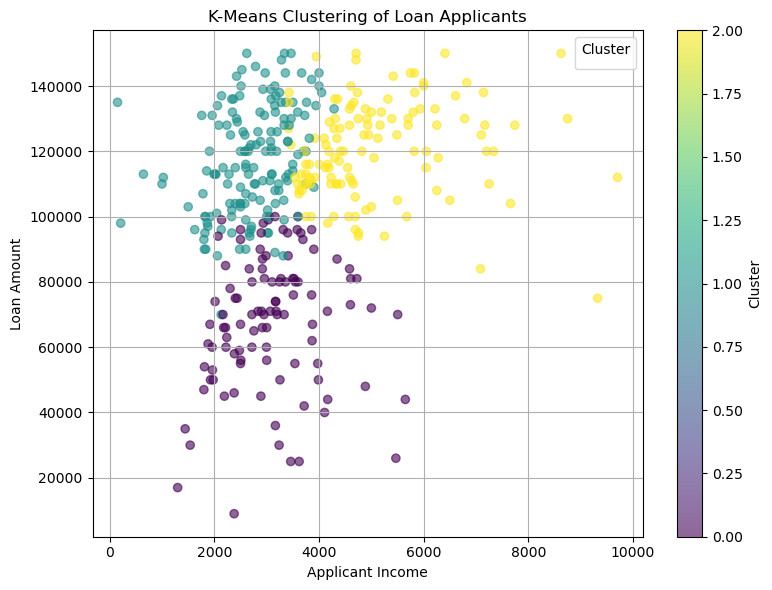

In [817]:

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


# 2. Select numeric features for clustering
features = ['Applicant_income', 'Co-applicant_income', 'Loan_amount']
df_cluster = cleaned[features].dropna()

# 3. Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

# 4. Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df_cluster['Cluster'] = kmeans.fit_predict(X_scaled)

# 5. Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(df_cluster['Applicant_income'], df_cluster['Loan_amount'], 
            c=df_cluster['Cluster'], cmap='viridis', alpha=0.6)
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.title('K-Means Clustering of Loan Applicants')
plt.colorbar(label='Cluster')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

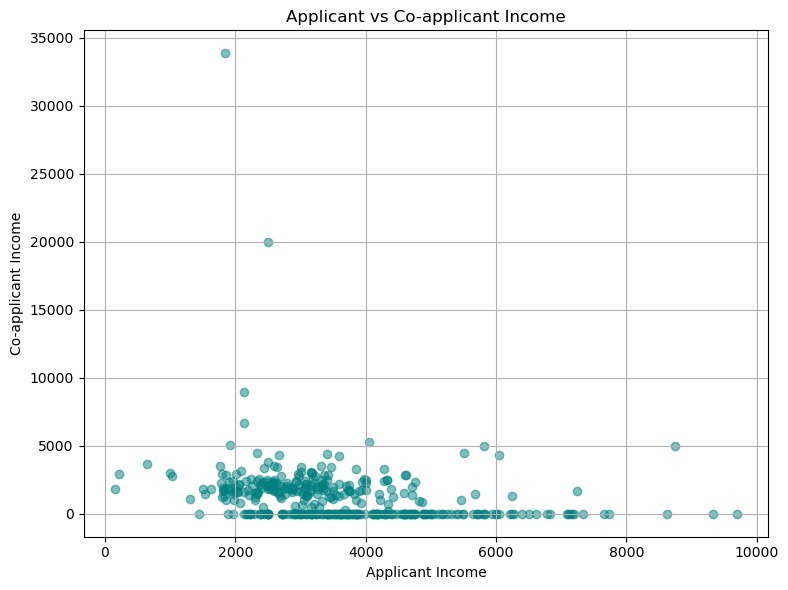

In [818]:
plt.figure(figsize=(8, 6))
plt.scatter(cleaned['Applicant_income'], cleaned['Co-applicant_income'], alpha=0.5, color='teal')
plt.xlabel('Applicant Income')
plt.ylabel('Co-applicant Income')
plt.title('Applicant vs Co-applicant Income')
plt.grid(True)
plt.tight_layout()
plt.show()


In [819]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(clean['Education'], clean['Loan_status'])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print(f"Chi-square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies:\n{expected}")

# Interpret the p-value
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There is a significant association between Education and Loan Status.")
else:
    print("Fail to reject the null hypothesis: No significant association between Education and Loan Status.")

Chi-square Statistic: 0.9172260352561867
P-value: 0.33820438049287227
Degrees of Freedom: 1
Expected Frequencies:
[[ 80.26246719 197.73753281]
 [ 29.73753281  73.26246719]]
Fail to reject the null hypothesis: No significant association between Education and Loan Status.


In [820]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(clean['Property_area'], clean['Loan_status'])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print(f"Chi-square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies:\n{expected}")

# Interpret the p-value
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There is a significant association between Property Area and Loan Status.")
else:
    print("Fail to reject the null hypothesis: No significant association between Property Area and Loan Status.")

Chi-square Statistic: 10.769755159668561
P-value: 0.004585401633509754
Degrees of Freedom: 2
Expected Frequencies:
[[ 30.60367454  75.39632546]
 [ 43.0183727  105.9816273 ]
 [ 36.37795276  89.62204724]]
Reject the null hypothesis: There is a significant association between Property Area and Loan Status.


In [821]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(clean['Self_employed'], clean['Loan_status'])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print(f"Chi-square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies:\n{expected}")

# Interpret the p-value
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There is a significant association between Self_employed and Loan Status.")
else:
    print("Fail to reject the null hypothesis: No significant association between Self_employed and Loan Status.")

Chi-square Statistic: 0.023905171093224313
P-value: 0.877126442847448
Degrees of Freedom: 1
Expected Frequencies:
[[ 99.89501312 246.10498688]
 [ 10.10498688  24.89501312]]
Fail to reject the null hypothesis: No significant association between Self_employed and Loan Status.


# Predictions

In [822]:
cleaned['Loan_amount'] = pd.to_numeric(cleaned['Loan_amount'], errors='coerce')
cleaned['Loan_amount_term'] = pd.to_numeric(cleaned['Loan_amount_term'], errors='coerce')

# Replace zero, negative, and null values in 'Loan_amount_term' with NaN
cleaned['Loan_amount_term'] = cleaned['Loan_amount_term'].apply(lambda x: x if x > 0 else None)

# Fill NaN values with the median of the column
median_term = cleaned['Loan_amount_term'].median()
cleaned['Loan_amount_term'] = cleaned['Loan_amount_term'].fillna(median_term)

# Recalculate Monthly_installments
cleaned['Monthly_installments'] = (cleaned['Loan_amount'] / cleaned['Loan_amount_term']).round(2)


In [823]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Set seed for reproducibility
np.random.seed(42)

# 1. Generate synthetic credit scores
cleaned['Credit_score'] = (
    300 +
    cleaned['Credit_history'] * 200 +  # history boost
    (cleaned['Applicant_income'] + cleaned['Co-applicant_income']) / 1000 * 20 +  # income effect
    np.random.normal(0, 50, len(cleaned))  # some noise
).clip(300, 850).round()

# 2. Assign approval based on credit score threshold
approval_threshold = 600
cleaned['Predicted_Loan_approval'] = np.where(
    cleaned['Credit_score'] < approval_threshold, 'Rejected', 'Approved'
)

# 3. Select features & clean them
features = ['Credit_history', 'Applicant_income', 'Co-applicant_income', 'Loan_amount', 'Loan_amount_term']
X = cleaned[features].fillna(0)
y = cleaned['Predicted_Loan_approval'].map({'Rejected': 0, 'Approved': 1})

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Train Random Forest model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# 6. Predict & evaluate
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) * 100

print(f"Model Accuracy: {accuracy:.2f}%")

# 7. Show predictions vs actual
result_df = X_test.copy()
result_df['Actual_Approval'] = y_test
result_df['Predicted_Approval'] = y_pred
result_df['Predicted_Approval'] = result_df['Predicted_Approval'].map({1: 'Approved', 0: 'Rejected'})
result_df['Actual_Approval'] = result_df['Actual_Approval'].map({1: 'Approved', 0: 'Rejected'})

print(result_df)


Model Accuracy: 74.03%
     Credit_history  Applicant_income  Co-applicant_income  Loan_amount  \
266               1              5829                    0       138000   
192               1              1625                 1803        96000   
46                1              3029                    0        99000   
55                1              1000                 3022       110000   
57                1              3846                    0       111000   
..              ...               ...                  ...          ...   
165               1              4708                 1387       150000   
63                1              3273                 1820        81000   
249               0              3276                  484       135000   
280               1              7142                    0       138000   
357               1              2378                    0         9000   

     Loan_amount_term Actual_Approval Predicted_Approval  
266             3

In [824]:
cleaned["Married"] = cleaned["Married"].map({True:'Yes', False: "No"})
cleaned["Self_employed"] = cleaned["Self_employed"].map({True: "Yes", False: "No"})

In [825]:
cleaned.isnull().sum()

Name                       0
Loan_id                    0
Gender                     0
Married                    0
Dependents                 0
Education                  0
Self_employed              0
Applicant_income           0
Co-applicant_income        0
Loan_amount                0
Loan_amount_term           0
Credit_history             0
Property_area              0
Loan_status                0
Total_income               0
Monthly_installments       0
Credit_score               0
Predicted_Loan_approval    0
dtype: int64

In [826]:
cleaned["Dependents"] = cleaned["Dependents"].replace(['0', '1','3+'],[0,1,4])

In [827]:
cleaned

,Name,Loan_id,Gender,Married,Dependents,Education,Self_employed,Applicant_income,Co-applicant_income,Loan_amount,Loan_amount_term,Credit_history,Property_area,Loan_status,Total_income,Monthly_installments,Credit_score,Predicted_Loan_approval
0,Kevin Bennett,LP001003,Male,Yes,1,Graduate,No,4583,1508,128000,360.0,1,Rural,Declined,6091,355.56,647.0,Approved
1,Dr. Timothy Wilson MD,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66000,360.0,1,Urban,Accepted,3000,183.33,553.0,Rejected
2,Daniel Levine,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120000,360.0,1,Urban,Accepted,4941,333.33,631.0,Approved
3,Henry Oconnell,LP001008,Male,No,0,Graduate,No,6000,0,141000,360.0,1,Urban,Accepted,6000,391.67,696.0,Approved
4,John Mendoza,LP001013,Male,Yes,0,Not Graduate,No,2333,1516,95000,360.0,1,Urban,Accepted,3849,263.89,565.0,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,Grant Stone,LP002953,Male,Yes,4,Graduate,No,5703,0,128000,360.0,1,Urban,Accepted,5703,355.56,658.0,Approved
377,Christopher Wood,LP002974,Male,Yes,0,Graduate,No,3232,1950,108000,360.0,1,Rural,Accepted,5182,300.00,613.0,Approved
378,Heather Goodman,LP002978,Female,No,0,Graduate,No,2900,0,71000,360.0,1,Rural,Accepted,2900,197.22,667.0,Approved
379,Christopher Petty,LP002979,Male,Yes,4,Graduate,No,4106,0,40000,180.0,1,Rural,Accepted,4106,222.22,542.0,Rejected


In [828]:
cleaned.dtypes
cleaned.isnull().sum()

Name                       0
Loan_id                    0
Gender                     0
Married                    0
Dependents                 0
Education                  0
Self_employed              0
Applicant_income           0
Co-applicant_income        0
Loan_amount                0
Loan_amount_term           0
Credit_history             0
Property_area              0
Loan_status                0
Total_income               0
Monthly_installments       0
Credit_score               0
Predicted_Loan_approval    0
dtype: int64

In [829]:
import numpy as np

# Replace non-numeric entries (like '3+') with a numeric value, e.g., 3
cleaned['Dependents'] = cleaned['Dependents'].replace({'3+': 3})

# Convert the column to numeric, forcing errors to NaN (if any remain)
cleaned['Dependents'] = pd.to_numeric(cleaned['Dependents'], errors='coerce')

# Optionally, fill NaNs with a default value (e.g., 0) or drop them
cleaned['Dependents'] = cleaned['Dependents'].fillna(0).astype(int)
cleaned

,Name,Loan_id,Gender,Married,Dependents,Education,Self_employed,Applicant_income,Co-applicant_income,Loan_amount,Loan_amount_term,Credit_history,Property_area,Loan_status,Total_income,Monthly_installments,Credit_score,Predicted_Loan_approval
0,Kevin Bennett,LP001003,Male,Yes,1,Graduate,No,4583,1508,128000,360.0,1,Rural,Declined,6091,355.56,647.0,Approved
1,Dr. Timothy Wilson MD,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66000,360.0,1,Urban,Accepted,3000,183.33,553.0,Rejected
2,Daniel Levine,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120000,360.0,1,Urban,Accepted,4941,333.33,631.0,Approved
3,Henry Oconnell,LP001008,Male,No,0,Graduate,No,6000,0,141000,360.0,1,Urban,Accepted,6000,391.67,696.0,Approved
4,John Mendoza,LP001013,Male,Yes,0,Not Graduate,No,2333,1516,95000,360.0,1,Urban,Accepted,3849,263.89,565.0,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,Grant Stone,LP002953,Male,Yes,4,Graduate,No,5703,0,128000,360.0,1,Urban,Accepted,5703,355.56,658.0,Approved
377,Christopher Wood,LP002974,Male,Yes,0,Graduate,No,3232,1950,108000,360.0,1,Rural,Accepted,5182,300.00,613.0,Approved
378,Heather Goodman,LP002978,Female,No,0,Graduate,No,2900,0,71000,360.0,1,Rural,Accepted,2900,197.22,667.0,Approved
379,Christopher Petty,LP002979,Male,Yes,4,Graduate,No,4106,0,40000,180.0,1,Rural,Accepted,4106,222.22,542.0,Rejected


In [830]:
# Overwrite the table with the cleaned DataFrame
success, nchunks, nrows, _ = write_pandas(
    ctx,
    cleaned,
    'Loan_Approval',
    overwrite=True,        # Overwrite the existing table
    auto_create_table=True # Create the table if it doesn't exist
)
print(f"Success: {success}, Chunks: {nchunks}, Rows: {nrows}")
ctx.close()


Success: True, Chunks: 1, Rows: 381
